<a href="https://colab.research.google.com/github/cRaeber/FacialRecognitionWithDeepLearning/blob/main/code/ModelPerfomanceOnSplitDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Data Upload

In [ ]:
import numpy as np
import seaborn as sns
# from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import image

import os
from os import listdir
import zipfile
from google.colab import drive

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import random
import glob
import shutil

###Data Spliting

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = ['/tmp/Faces', '/tmp/Faces/Train', '/tmp/Faces/Val', '/tmp/Faces/Test',
        '/tmp/Faces/Train/Me',    '/tmp/Faces/Val/Me',    '/tmp/Faces/Test/Me',
        '/tmp/Faces/Train/NotMe', '/tmp/Faces/Val/NotMe', '/tmp/Faces/Test/NotMe']
for p in path:
  os.mkdir(p)

In [ ]:
!rm -rf '/tmp/Faces'

Will only be run once then downloaded for reusability. Shuffle the data then split into:

 70% Training

 20% Validation

 10% Test

In [ ]:
path = '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/Faces/'
face = []
for picture in listdir(path + 'Me'):
  img = (path + 'Me/' + picture)
  face.append(img)
random.shuffle(face)
i = 0
for pic in face:
  if i < (len(face) * 0.7):
    shutil.move(face[i], '/tmp/Faces/Train/Me')
  elif i < (len(face)* 0.9):
    shutil.move(face[i], '/tmp/Faces/Val/Me')
  else:
    shutil.move(face[i], '/tmp/Faces/Test/Me')
  i += 1

face = []
for picture in listdir(path + 'NotMe'):
  img = (path + 'NotMe/' + picture)
  face.append(img)
random.shuffle(face)

i = 0
for pic in face:
  if i < (len(face) * 0.7):
    shutil.move(face[i], '/tmp/Faces/Train/NotMe')
  elif i < (len(face)* 0.9):
    shutil.move(face[i], '/tmp/Faces/Val/NotMe')
  else:
    shutil.move(face[i], '/tmp/Faces/Test/NotMe')
  i += 1

Read in Training, Validation, and Test data

In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/FacesSplit/Train/',
  image_size=(img_height, img_width),
  batch_size = batch_size)

Found 1248 files belonging to 2 classes.


In [ ]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/FacesSplit/Val/',
  image_size=(img_height, img_width),
  batch_size = batch_size)

Found 350 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/FacesSplit/Test/',
  image_size=(img_height, img_width),
  batch_size = batch_size)

Found 176 files belonging to 2 classes.


### Model Creation

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x0 = layers.Rescaling(1./255)(inputs)
x0 = layers.Conv2D(filters=32, kernel_size=3, activation="relu") (x0)
x0 = layers.MaxPooling2D(pool_size=2)(x0)
x0 = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x0)
x0 =layers.MaxPooling2D(pool_size=2)(x0)
x0 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x0)
x0 =layers.Flatten()(x0)
outputs = layers.Dense(1, activation="sigmoid")(x0)
model0 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x1 = layers.Rescaling(1./255)(inputs)

x1 = layers.BatchNormalization() (x1)
x1 = layers.Conv2D(filters = 4, kernel_size = 3, activation = 'relu', padding='same')(x1)
x1 = layers.Dropout(rate=0.4)(x1)
x1 = layers.Conv2D(filters = 4, kernel_size = 3, activation = 'relu', padding='same')(x1)

x1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu") (x1)
x1 = layers.MaxPooling2D(pool_size=2)(x1)
x1 = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x1)
x1 =layers.MaxPooling2D(pool_size=2)(x1)
x1 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x1)
x1 =layers.Flatten()(x1)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model1 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x2 = layers.Rescaling(1./255)(inputs)
x2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu") (x2)
x2 = layers.MaxPooling2D(pool_size=2)(x2)
x2 = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(x2)
x2 =layers.MaxPooling2D(pool_size=2)(x2)
x2 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x2)
x2 =layers.Flatten()(x2)

x2 = layers.Dense(8, activation="relu")(x2)

outputs = layers.Dense(1, activation="sigmoid")(x2)
model2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x3 = layers.Rescaling(1./255)(inputs)
x3 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x3)
x3 =layers.MaxPooling2D(pool_size=2)(x3)
x3 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x3)
x3 =layers.MaxPooling2D(pool_size=2)(x3)
x3 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x3)
x3 =layers.MaxPooling2D(pool_size=2)(x3)
x3 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x3)
x3 =layers.Flatten()(x3)
outputs = layers.Dense(1, activation="sigmoid")(x3)
model3 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x4 = layers.Rescaling(1./255)(inputs)

x4 = layers.BatchNormalization() (x4)
x4 = layers.Conv2D(filters = 4, kernel_size = 3, activation = 'relu', padding='same')(x4)
x4 = layers.Dropout(rate=0.4)(x4)
x4 = layers.Conv2D(filters = 4, kernel_size = 3, activation = 'relu', padding='same')(x4)

x4 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x4)
x4 =layers.MaxPooling2D(pool_size=2)(x4)
x4 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x4)
x4 =layers.MaxPooling2D(pool_size=2)(x4)
x4 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x4)
x4 =layers.MaxPooling2D(pool_size=2)(x4)
x4 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x4)
x4 =layers.Flatten()(x4)
outputs = layers.Dense(1, activation="sigmoid")(x4)
model4 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, 3))
x5 = layers.Rescaling(1./255)(inputs)
x5 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x5)
x5 =layers.Flatten()(x5)

x5 = layers.Dense(8, activation="relu")(x5)

outputs = layers.Dense(1, activation="sigmoid")(x5)
model5 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model0.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Model Training

In [ ]:
filepath0="weights0-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath1="weights1-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath2="weights2-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath3="weights3-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath4="weights4-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath5="weights5-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint0 = ModelCheckpoint(filepath0, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint3 = ModelCheckpoint(filepath3, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint4 = ModelCheckpoint(filepath4, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint5 = ModelCheckpoint(filepath5, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=32)

In [ ]:
history0 = model0.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint0, earlyStop])
history1 = model1.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint1, earlyStop])
history2 = model2.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint2, earlyStop])
history3 = model3.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint3, earlyStop])
history4 = model4.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint4, earlyStop])
history5 = model5.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint5, earlyStop])

### Model Evaluation

In [ ]:
models = [model0, model1, model2, model3, model4, model5]

In [ ]:
i = 0
for model in models:
  trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
  nonTrainableParams = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
  totalParams = trainableParams + nonTrainableParams
  print("Number of Parameters in Model", i, ":", int(totalParams))
  i += 1

Number of Parameters in Model 0 : 17901
Number of Parameters in Model 1 : 18461
Number of Parameters in Model 2 : 118717
Number of Parameters in Model 3 : 9385
Number of Parameters in Model 4 : 9945
Number of Parameters in Model 5 : 31353


#### Evaluation Functions

In [ ]:
def learning_curve (history):
  fig, axs = plt.subplots(1, 2, constrained_layout= True)
  axs[0].set_ylim(-0.1, 1.10)
  axs[1].set_ylim(-0.1, 1.10)
  fig.suptitle('Training Performance')
  axs[0].plot(history.history['accuracy'], label='Training Accuracy') 
  axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
  axs[0].legend()
  axs[0].set_title('Accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')

  axs[1].plot(history.history['loss'], label='Training Loss')
  axs[1].plot(history.history['val_loss'], label = 'Validation Loss')
  axs[1].legend()
  axs[1].set_title('Loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  plt.show()

In [ ]:
def model_accuracy (X, Y, model, prediction):
  print("Test Data Results:")
  scores = model.evaluate(X, Y)
  for i in range(len(scores)):
    print("%s: %.3f%%" % (model.metrics_names[i], scores[i]*100))

  accuracy = accuracy_score(Y, prediction.round()) * 100
  precision = precision_score(Y, prediction.round()) * 100
  recall = recall_score(Y, prediction.round()) * 100
  f1score = f1_score(Y, prediction.round())
  
  print("Accuracy Score: %.6s%%" % (accuracy))
  print("Precision Score: %.6s%%" % (precision))
  print("Recall Score: %.6s%%" % (recall))
  print("F1 Score: %.6s" % (f1score))

#### Evaluation Results

In [ ]:
#batch size must be the entire test set
X_Length = 176

batch_size = X_Length
img_height = 256
img_width = 256
eval_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/FacesSplit/Test/',
  seed=123,
  image_size=(img_height, img_width),
  batch_size = batch_size)

for images, labels in eval_ds.take(1):
  xtest = images.numpy()
  ytest = labels.numpy()
print(ytest.shape)
print(xtest.shape)

Found 176 files belonging to 2 classes.
(176,)
(176, 256, 256, 3)


Model0:
Test Data Results:
6/6 [==============================] - 0s 13ms/step - loss: 0.1112 - accuracy: 0.9830
loss: 11.118%
accuracy: 98.295%
Accuracy Score: 98.295%
Precision Score: 98.4%
Recall Score: 99.193%
F1 Score: 0.9879


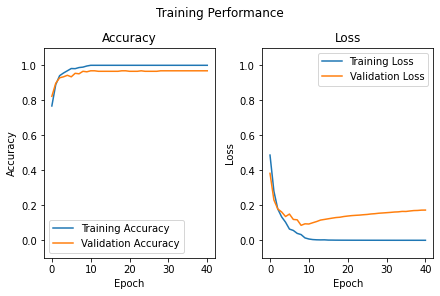

In [ ]:
prediction = model0.predict(xtest)
print("Model0:")
model_accuracy(xtest, ytest, model0, prediction)
learning_curve(history0)

Model1:
Test Data Results:
6/6 [==============================] - 0s 15ms/step - loss: 0.3126 - accuracy: 0.9261
loss: 31.257%
accuracy: 92.614%
Accuracy Score: 92.613%
Precision Score: 97.435%
Recall Score: 91.935%
F1 Score: 0.9460


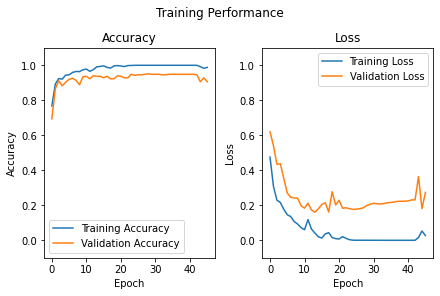

In [ ]:
prediction = model1.predict(xtest)
print("Model1:")
model_accuracy(xtest, ytest, model1, prediction)
learning_curve(history1)

Model2:
Test Data Results:
6/6 [==============================] - 0s 12ms/step - loss: 0.1428 - accuracy: 0.9773
loss: 14.281%
accuracy: 97.727%
Accuracy Score: 97.727%
Precision Score: 96.875%
Recall Score: 100.0%
F1 Score: 0.9841


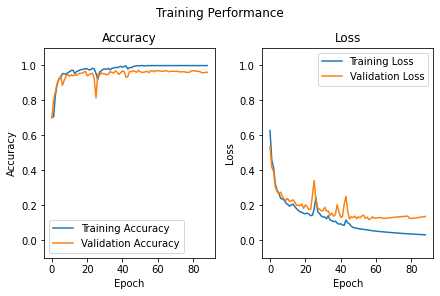

In [ ]:
prediction = model2.predict(xtest)
print("Model2:")
model_accuracy(xtest, ytest, model2, prediction)
learning_curve(history2)

Model3:
Test Data Results:
6/6 [==============================] - 0s 13ms/step - loss: 0.0475 - accuracy: 0.9830
loss: 4.751%
accuracy: 98.295%
Accuracy Score: 98.295%
Precision Score: 99.186%
Recall Score: 98.387%
F1 Score: 0.9878


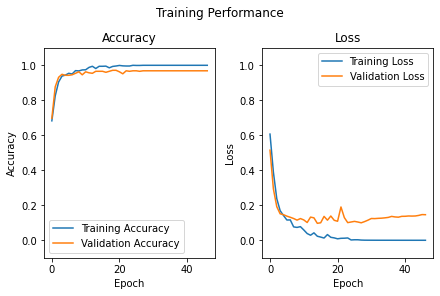

In [ ]:
prediction = model3.predict(xtest)
print("Model3:")
model_accuracy(xtest, ytest, model3, prediction)
learning_curve(history3)

Model4:
Test Data Results:
6/6 [==============================] - 0s 15ms/step - loss: 0.0863 - accuracy: 0.9602
loss: 8.625%
accuracy: 96.023%
Accuracy Score: 96.022%
Precision Score: 96.062%
Recall Score: 98.387%
F1 Score: 0.9721


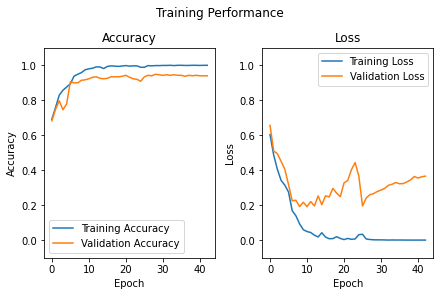

In [ ]:
prediction = model4.predict(xtest)
print("Model4:")
model_accuracy(xtest, ytest, model4, prediction)
learning_curve(history4)

Model5:
Test Data Results:
6/6 [==============================] - 0s 15ms/step - loss: 0.0100 - accuracy: 0.9943
loss: 1.004%
accuracy: 99.432%
Accuracy Score: 99.431%
Precision Score: 99.2%
Recall Score: 100.0%
F1 Score: 0.9959


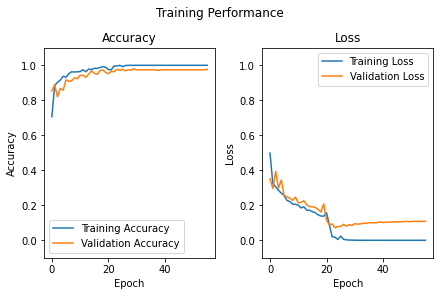

In [ ]:
prediction = model5.predict(xtest)
print("Model5:")
model_accuracy(xtest, ytest, model5, prediction)
learning_curve(history5)

In [ ]:
%%shell
jupyter nbconvert --to html /content/Phase3.ipynb

[NbConvertApp] Converting notebook /content/Phase3.ipynb to html
[NbConvertApp] Writing 520107 bytes to /content/Phase3.html
